In [6]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range('2017-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})
df.head()

,ds,y
0,2017-01-01,0.000000
1,2017-01-02,0.103243
2,2017-01-03,0.205382
3,2017-01-04,0.305326
4,2017-01-05,0.402007


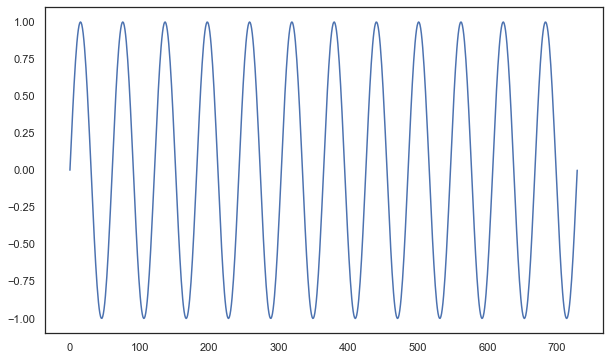

In [8]:
df['y'].plot(figsize=(10,6));

In [10]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality = True, daily_seasonality = True)
m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [11]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

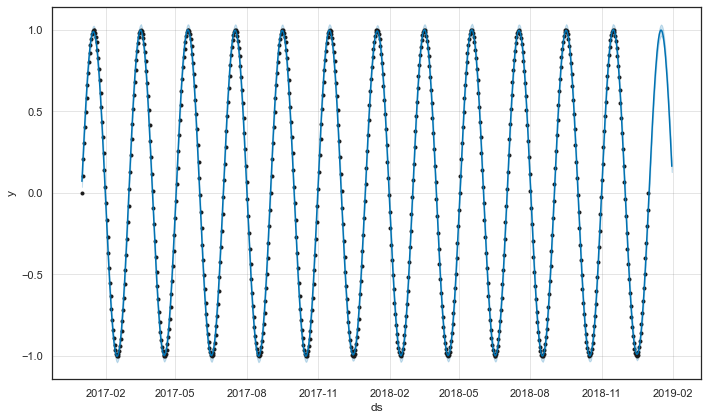

In [12]:
m.plot(forecast);

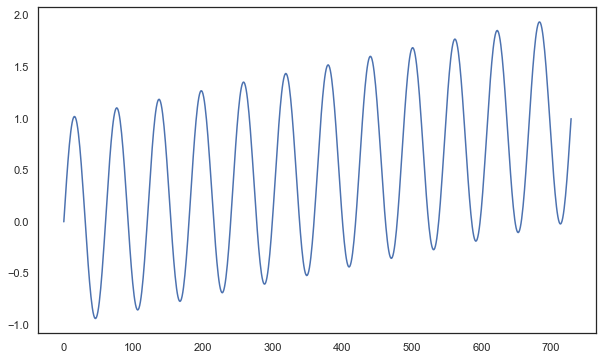

In [13]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range('2017-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})

df['y'].plot(figsize=(10,6));

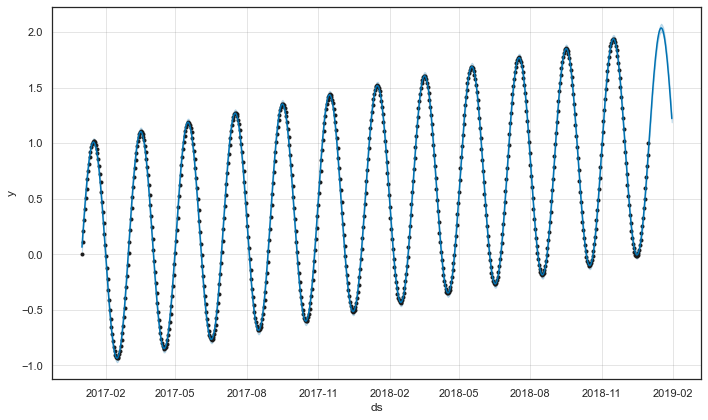

In [16]:
m = Prophet(yearly_seasonality = True, daily_seasonality = True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);


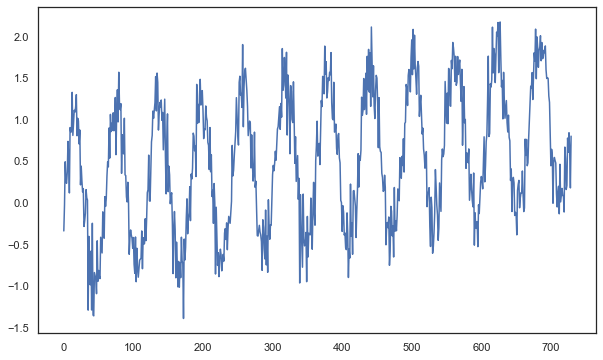

In [17]:
#noise 
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range('2017-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds':ds, 'y':result})

df['y'].plot(figsize=(10,6));

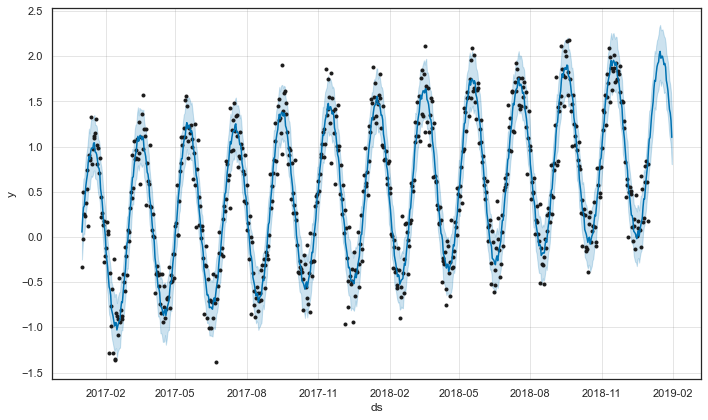

In [18]:
m = Prophet(yearly_seasonality = True, daily_seasonality = True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);


In [19]:
pinkwink_web = pd.read_excel('data/pinkwink_web.xlsx', names=['ds', 'hit'])
pinkwink_web.head()


,ds,hit
0,2016-01-01,228
1,2016-01-02,304
2,2016-01-03,304
3,2016-01-04,659
4,2016-01-05,769


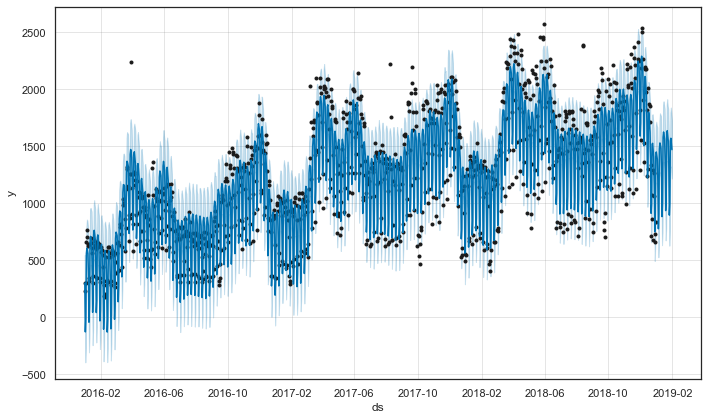

In [21]:
df = pd.DataFrame({'ds':pd.to_datetime(pinkwink_web['ds'], format='%y. %m. %d.'),
                   'y':pinkwink_web['hit']})

m = Prophet(yearly_seasonality = True, daily_seasonality = True)
m.fit(df)
future = m.make_future_dataframe(periods=31)
forecast = m.predict(future)
m.plot(forecast);

In [25]:
df

,ds,y
0,2016-01-01,228
1,2016-01-02,304
2,2016-01-03,304
3,2016-01-04,659
4,2016-01-05,769
...,...,...
1091,2018-12-27,1264
1092,2018-12-28,1061
1093,2018-12-29,729
1094,2018-12-30,656


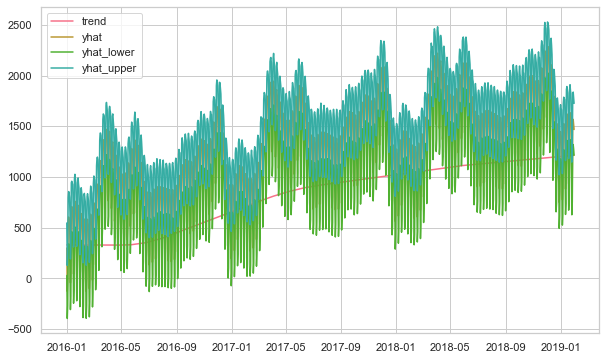

In [24]:
#trend and seasonal data
sns.set_style('whitegrid')
sns.set_palette('husl')

plt.figure(figsize=(10,6))
for each in ['trend', 'yhat','yhat_lower', 'yhat_upper']:
    plt.plot(forecast['ds'], forecast[each], label=each)
    
plt.legend(loc='best')

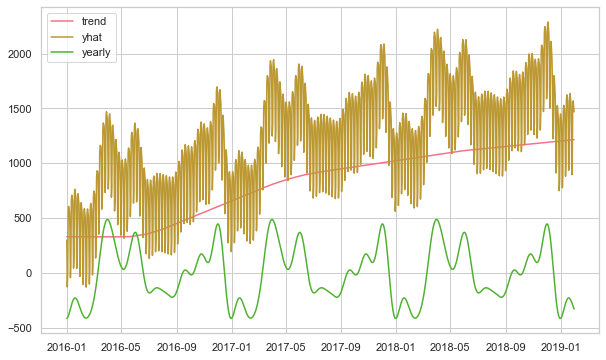

In [26]:
plt.figure(figsize=(10,6))
for each in ['trend', 'yhat','yearly']:
    plt.plot(forecast['ds'], forecast[each], label=each)
    
plt.legend(loc='best')